In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf
%matplotlib inline

In [2]:
np.random.seed(123)
n = 100
n_data_sets = 100
n_segments = 6
# generate sine data
x = np.linspace(0, 10, n)
y = np.zeros((n_data_sets, n))
for i in range(n_data_sets):
    y[i] = np.sin(x * np.pi / 2)
    # add noise to the data
    y[i] = np.random.normal(0, 0.05, 100) + y[i]
X = np.tile(x, n_data_sets)

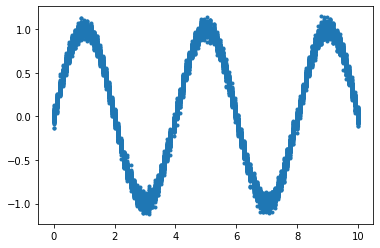

In [3]:
# plot all of the data
plt.figure()
plt.plot(X.flatten(), y.flatten(), '.')
plt.show()

In [4]:
# perform a single fit to all of the data
my_pwlf_global = pwlf.PiecewiseLinFit(X.flatten(), y.flatten())
my_pwlf_global.fit(n_segments)

array([ 0.        ,  1.05164435,  2.98570544,  5.00010778,  7.01335991,
        8.94940776, 10.        ])

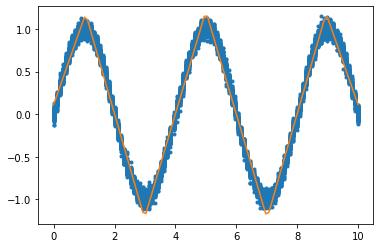

In [5]:
# plot all of the data with global fit
yhat = my_pwlf_global.predict(x)
plt.figure()
plt.plot(X.flatten(), y.flatten(), '.')
plt.plot(x, yhat, '-')
plt.plot()
plt.show()

In [6]:
# for each data set, fit a pwlf model using the global breaks
my_pwlf_models = []
slopes = []
for i in range(n_data_sets):
    temp_pwlf = pwlf.PiecewiseLinFit(x, y[i])
    temp_pwlf.fit_with_breaks(my_pwlf_global.fit_breaks)
    my_pwlf_models.append(temp_pwlf)
    slopes.append(temp_pwlf.slopes)

In [7]:
slopes = np.array(slopes)
print(my_pwlf_global.slopes)
print(slopes.mean(axis=0))
print(slopes.std(axis=0))

[ 1.01504066 -1.24340053  1.2084571  -1.21045573  1.24507127 -1.02114751]
[ 1.01504066 -1.24340053  1.2084571  -1.21045573  1.24507127 -1.02114751]
[0.03299628 0.01432216 0.01273798 0.01173331 0.01313007 0.03130695]
